In [ ]:
#What were the most common descriptive words or phrases used by the tasters to describe the wine that receive the 
#highest scores? What words or phrases do they use to describe wine they give the lowest scores?

In [1]:
            #######################          LIBRARIES                 #######################

#Import required libraries
import nltk
import nltk.corpus
import pandas as pd
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import re
from nltk.probability import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
            #######################          DATAFRAME PREPARATION    #######################

#open the csv file and read as dataframe
wine_df = pd.read_csv("/Users/atyam/Desktop/M&M/winemag-data-130k-v2.csv")
#read few rows and all columns
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
        
            #######################          DATAFRAME CLEANING           #######################

#Remove duplicates from the dataframe based on the description column, use keep = first argument to keep one and remove 
#other duplicates for that row.
wine_df.drop_duplicates(subset=['description'], keep="first", inplace = True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               119955 non-null int64
country                  119896 non-null object
description              119955 non-null object
designation              85423 non-null object
points                   119955 non-null int64
price                    111567 non-null float64
province                 119896 non-null object
region_1                 100397 non-null object
region_2                 46760 non-null object
taster_name              95043 non-null object
taster_twitter_handle    90514 non-null object
title                    119955 non-null object
variety                  119954 non-null object
winery                   119955 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.7+ MB


In [4]:
#Create new subset dataframe from the main dataframe
taster_df = wine_df[['taster_name','description','title','points']]
taster_df.head()

,taster_name,description,title,points
0,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Nicosia 2013 Vulkà Bianco (Etna),87
1,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos 2011 Avidagos Red (Douro),87
2,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley),87
3,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...,87
4,Paul Gregutt,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87


In [5]:
#Subset dataframe features
taster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 4 columns):
taster_name    95043 non-null object
description    119955 non-null object
title          119955 non-null object
points         119955 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


In [6]:
               #######################          ANALYSIS          #######################


taster_points = taster_df.groupby(['title','description'], as_index=False)[['points']].sum().sort_values('points', ascending = False)
print(taster_points.head())
print(taster_points.tail())

                                                   title  \
90044      Quinta do Noval 2011 Nacional Vintage  (Port)   
21318  Charles Smith 2006 Royal City Syrah (Columbia ...   
70192  Louis Roederer 2008 Cristal Vintage Brut  (Cha...   
25190      Château Léoville Las Cases 2010  Saint-Julien   
17568      Casa Ferreirinha 2008 Barca-Velha Red (Douro)   

                                             description  points  
90044  A powerful and ripe wine, strongly influenced ...     100  
21318  In 2005 Charles Smith introduced three high-en...     100  
70192  This latest incarnation of the famous brand is...     100  
25190  A hugely powerful wine, full of dark, brooding...     100  
17568  This is the latest release of what has long be...     100  
                                                    title  \
57557   Ignacio Marín 2008 Duque de Medina Reserva Old...   
78780                 Mountain Door 2014 Malbec (Mendoza)   
95996           San Pedro 2011 Epica Red (Central Vall

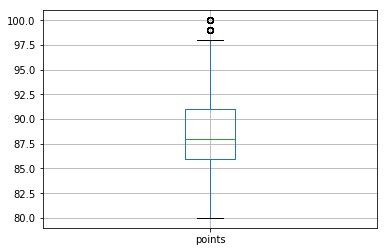

In [8]:
#Find the low, higher values from the box plot
boxplot = taster_points.boxplot(column='points')
boxplot

In [ ]:
              
                 #################      WORDS FOR HIGHER POINTS          ###################
        

In [9]:
#Find the max points for the wine recieved by the tasters. Based on above score greater than 95 is high score
highval = []
for index, row in taster_points.iterrows():
    if row[2] >95:
        highval.append(row[2])
print(len(highval))

878


In [74]:
#Index the dataframe rows to the required number of rows
wine_title_max = taster_points[0:878]
wine_title_max.head()

,title,description,points
90044,Quinta do Noval 2011 Nacional Vintage (Port),"A powerful and ripe wine, strongly influenced ...",100
21318,Charles Smith 2006 Royal City Syrah (Columbia ...,In 2005 Charles Smith introduced three high-en...,100
70192,Louis Roederer 2008 Cristal Vintage Brut (Cha...,This latest incarnation of the famous brand is...,100
25190,Château Léoville Las Cases 2010 Saint-Julien,"A hugely powerful wine, full of dark, brooding...",100
17568,Casa Ferreirinha 2008 Barca-Velha Red (Douro),This is the latest release of what has long be...,100


In [75]:
#Now index the description column for further analysis
wine_title_max_desc =wine_title_max['description']
wine_title_max_desc.head()

90044    A powerful and ripe wine, strongly influenced ...
21318    In 2005 Charles Smith introduced three high-en...
70192    This latest incarnation of the famous brand is...
25190    A hugely powerful wine, full of dark, brooding...
17568    This is the latest release of what has long be...
Name: description, dtype: object

In [76]:
#Now save only description data part to the variable
maxwine_desc= wine_title_max_desc.values
maxwine_desc

In [77]:
#Check the type of the variable.
type(maxwine_desc)

numpy.ndarray

In [78]:
# Use for loop 
maxwine_desc_words = []                                # Open a list to load the tokens
fdist = FreqDist()                                     # Assign a variable to frequency distribution function
punctuation =re.compile(r'[-.?,:;()|0:9]')             #The punctuations are removed by using regular expression in taste description words
stop_words = set(stopwords.words('english'))           # set the stop words
for line in maxwine_desc:
    maxwine_desc_tokens = word_tokenize(line)
    for words in maxwine_desc_tokens:
        word = punctuation.sub("", words)              # Removes the punctuatioon as defined in the above code
        if (word not in stop_words and  len(word)>3):  # I use len 3 because to remove some of the stop words like is, the,s
            maxwine_desc_words.append(word)
    for w in maxwine_desc_words:
        fdist[w.lower()]+=1                           # word to lower case-> to avoid the probability of considering 
                                                      # upper and lower case as different and it assigns the total 
                                                      # frequency count to each word. 

In [80]:
# The most common descriptive words used by the tasters to describe the wine that received the highest scores:
wine_topwords = fdist.most_common(11)
wine_topwords

[('wine', 414002),
 ('this', 167830),
 ('tannins', 153664),
 ('fruit', 147719),
 ('drink', 145842),
 ('flavors', 145405),
 ('black', 128323),
 ('acidity', 122017),
 ('years', 101832),
 ('ripe', 96370),
 ('rich', 90087)]

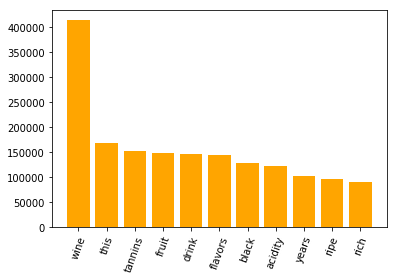

In [81]:
#Plot the scores in barplot for visualization 

plt.bar(range(len(wine_topwords)), [val[1] for val in wine_topwords], align='center', color = "orange")
plt.xticks(range(len(wine_topwords)), [val[0] for val in wine_topwords])
plt.xticks(rotation=70)
plt.show()

In [ ]:

                   #################          WORDS FOR LOWER POINTS         ###################
    

In [82]:
#Find the low points for the wine recieved by the tasters. Assumed score less than 82 is low score
lowval = []
for index, row in taster_points.iterrows():
    if row[2] < 82:
        lowval.append(row[2])
print(len(lowval))

1086


In [83]:
#Index the rows to the required.
wine_title_lower = taster_points[118869:]
wine_title_lower.head()

,title,description,points
119354,Zenaida Cellars 2001 Sangiovese (Paso Robles),"Earthy, smoky aromas with a hint of bacon turn...",81
70264,Love 2015 Cabernet Sauvignon (Vino de la Tierr...,Scattershot aromas of generic berry and cinnam...,81
47231,Finca Patagonia 2015 Expedicion Pinot Noir (Ma...,Aromas of chewing gum dust are not attractive....,81
70267,Love 2015 Moscato (Vino de la Tierra de Castilla),"Bland, sweet aromas are not persuasive. This f...",81
53203,Greg Norman California Estates 2005 Zinfandel ...,"Tastes very hot, with a high alcohol peppery b...",81


In [84]:
#Now index the description column for further analysis
wine_desc_lower =wine_title_lower['description']
wine_desc_lower.head()

119354    Earthy, smoky aromas with a hint of bacon turn...
70264     Scattershot aromas of generic berry and cinnam...
47231     Aromas of chewing gum dust are not attractive....
70267     Bland, sweet aromas are not persuasive. This f...
53203     Tastes very hot, with a high alcohol peppery b...
Name: description, dtype: object

In [85]:
lowwine_desc= wine_desc_lower.values
lowwine_desc

array(['Earthy, smoky aromas with a hint of bacon turn gluey and artifically sweet in the mouth, with the taste of cherry cough syrup. An acceptable wine.',
       'Scattershot aromas of generic berry and cinnamon smell forced and fake. This has a tannic scrubbing mouthfeel and artificial flavors of chocolate and cheap oak. A green note and burn on the finish do nothing to help this along.',
       'Aromas of chewing gum dust are not attractive. This feels flat, with zero edge and structure. Lightly oxidized flavors of generic berry leave one with nothing to latch on to.',
       ...,
       'All of the new Epica wines from San Pedro seem highly manufactured and sweet. This blend is stalky and murky smelling, then heavy and cloying in the mouth, with sugar-meets-herbal flavors that finish hot and syrupy.',
       'Stalky and oxidized on the nose, this becomes cidery, high in acid in the mouth, with sour-lemon flavors.',
       'This is a heartbeat or two from being DOA. Tan in color wi

In [93]:
lowwine_desc_words = []                                 # Open a list to load the tokens
fdist1 = FreqDist()                                     # Assign a variable to frequency distribution function
punctuation =re.compile(r'[-.?,:;()|0:9]')             #The punctuations are removed by using regular expression in taste description words
stop_words = set(stopwords.words('english'))            # set the stop words
for line in lowwine_desc:
    lowwine_desc_tokens = word_tokenize(line)
    for words in lowwine_desc_tokens:
        word = punctuation.sub("", words)               # Removes the punctuatioon as defined in the above code
        if (word not in stop_words and  len(word)>3):   # I use len 3 because to remove some of the stop words like is, the,s
            lowwine_desc_words.append(word)
    for w in lowwine_desc_words:
        fdist1[w.lower()]+=1                           # word to lower case-> to avoid the probability of considering 
                                                       # upper and lower case as different and it assigns the total 
                                                       # frequency count to each word. 

In [96]:
#The most common descriptive words used by the tasters to describe the wine that received the lowest scores:
wine_lowwords = fdist1.most_common(11)
wine_lowwords

[('flavors', 335347),
 ('aromas', 201701),
 ('wine', 199329),
 ('finish', 177932),
 ('this', 174729),
 ('palate', 146502),
 ('fruit', 124118),
 ('sweet', 109991),
 ('green', 81425),
 ('tastes', 79149),
 ('nose', 77635)]

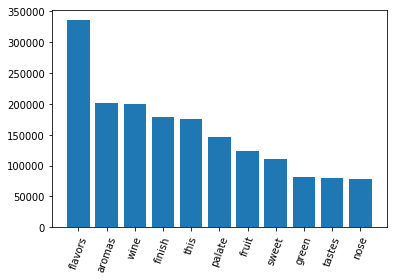

In [97]:
#Plot the scores in barplot for visualization 

plt.bar(range(len(wine_lowwords)), [val[1] for val in wine_lowwords], align='center')
plt.xticks(range(len(wine_lowwords)), [val[0] for val in wine_lowwords])
plt.xticks(rotation=70)
plt.show()